# Capstone Project- Ranking of Restaurants

###### By Khundhana Madurai

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 1. Acquiring the Data

In [2]:
df=pd.read_csv('zomato.csv')

In [3]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [5]:
df.shape

(51717, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [7]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [8]:
df.rename(columns={'approx_cost(for two people)': 'approx_cost'}, inplace=True)
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### 2. Preprocessing the Data

#### 2.1 Checking for Null Values

In [9]:
df.isnull().sum() #Counting the number of null values

url                    0
address                0
name                   0
online_order           0
book_table             0
rate                7775
votes                  0
phone               1208
location              21
rest_type            227
dish_liked         28078
cuisines              45
approx_cost          346
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
dtype: int64

In [10]:
df.dropna(subset=['rate'], inplace=True)
df.isnull().sum()

url                    0
address                0
name                   0
online_order           0
book_table             0
rate                   0
votes                  0
phone                832
location               0
rest_type            151
dish_liked         20333
cuisines              11
approx_cost          252
reviews_list           0
menu_item              0
listed_in(type)        0
listed_in(city)        0
dtype: int64

#### 2.2 Filling null values using median or mode

In [11]:
#The necessary columns that contain null values which need to be filled are approx_cost, rest_type and cuisines.
#Meadian is used for approx_cost and mode can be used for rest_type and cuisines

In [12]:
df['approx_cost']=df['approx_cost'].str.replace(',','')
df['approx_cost']=pd.to_numeric(df['approx_cost'], errors='coerce')

In [13]:
df['approx_cost'].fillna(df.approx_cost.median(), inplace=True)

In [14]:
df['rest_type'].fillna(df.rest_type.mode()[0], inplace=True)
df['cuisines'].fillna(df.cuisines.mode()[0], inplace=True)

In [15]:
df.rename(columns={'listed_in(city)':'city'}, inplace=True)

In [16]:
df.isna().sum()

url                    0
address                0
name                   0
online_order           0
book_table             0
rate                   0
votes                  0
phone                832
location               0
rest_type              0
dish_liked         20333
cuisines               0
approx_cost            0
reviews_list           0
menu_item              0
listed_in(type)        0
city                   0
dtype: int64

#### 2.3 Removing insignificant columns

In [17]:
#We can deduce that the columns url,address,phone,dish_liked,reviews_list,menu_item,listed_in(type) are not necessary.
#Hence, we can drop them.
df.drop(columns=['url','address','phone','dish_liked','reviews_list','menu_item','listed_in(type)'], inplace=True)

In [18]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


#### 2.4 Converting Categorical information into Numerical

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 10 columns):
name            43942 non-null object
online_order    43942 non-null object
book_table      43942 non-null object
rate            43942 non-null object
votes           43942 non-null int64
location        43942 non-null object
rest_type       43942 non-null object
cuisines        43942 non-null object
approx_cost     43942 non-null float64
city            43942 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 3.7+ MB


In [20]:
df.online_order.value_counts()

Yes    28308
No     15634
Name: online_order, dtype: int64

In [21]:
df.book_table.value_counts()

No     37509
Yes     6433
Name: book_table, dtype: int64

In [22]:
#Coverting online_order and book_table into numerical data
df.loc[df.online_order=='Yes','online_order']=1
df.loc[df.online_order=='No','online_order']=0
df.loc[df.book_table=='Yes','book_table']=1
df.loc[df.book_table=='No','book_table']=0

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 10 columns):
name            43942 non-null object
online_order    43942 non-null int64
book_table      43942 non-null int64
rate            43942 non-null object
votes           43942 non-null int64
location        43942 non-null object
rest_type       43942 non-null object
cuisines        43942 non-null object
approx_cost     43942 non-null float64
city            43942 non-null object
dtypes: float64(1), int64(3), object(6)
memory usage: 3.7+ MB


In [24]:
df.rate=df.rate.str.replace('/5','')

In [25]:
df.rate=pd.to_numeric(df['rate'], errors='coerce')

In [26]:
df['rate'].fillna(df.rate.median(), inplace=True)

In [27]:
#rest_type and cuisines are to be brought into proper form before coverting them
df.rest_type=df.rest_type.str.replace(',','')
df.rest_type=df.rest_type.astype(str).apply(lambda x: ' '.join(sorted(x.split())))

In [28]:
df.cuisines=df.cuisines.str.replace(',','')
df.cuisines=df.cuisines.astype(str).apply(lambda x: ' '.join(sorted(x.split())))

In [29]:
#The rest_type and cuisines can be label encoded to numerical form after the data visualisation

#### 2.5 Finding the statistical information of the dataset

In [30]:
df.describe()

,online_order,book_table,rate,votes,approx_cost
count,43942.000000,43942.000000,43942.000000,43942.000000,43942.000000
mean,0.644213,0.146398,3.700426,333.430954,593.442856
std,0.478757,0.353508,0.428947,862.180633,457.573874
min,0.000000,0.000000,1.800000,0.000000,40.000000
25%,0.000000,0.000000,3.400000,17.000000,300.000000
50%,1.000000,0.000000,3.700000,64.000000,450.000000
75%,1.000000,0.000000,4.000000,254.000000,700.000000
max,1.000000,1.000000,4.900000,16832.000000,6000.000000


In [31]:
#Observations: The data is not normalised and it can be normalised later using the Standard Scaler

### 3. EDA and Data Visualisation 

Text(0.5, 1.0, 'Availability of Online-orders')

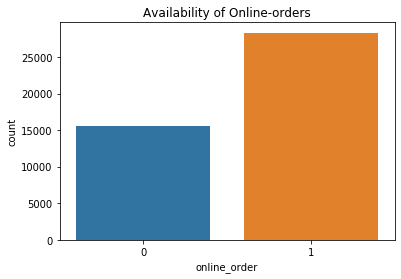

In [32]:
#Countplot of number of restaurants that accept online order
sns.countplot(x='online_order', data=df)
plt.title('Availability of Online-orders')

Text(0.5, 1.0, 'Availability of Book table option')

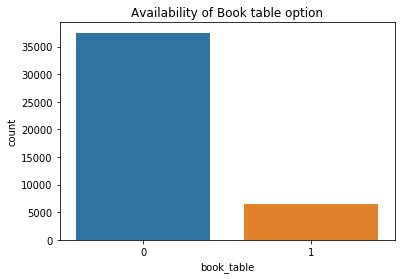

In [33]:
#Countplot of number of restaurants that accept booking of table
sns.countplot(x='book_table', data=df)
plt.title('Availability of Book table option')

Text(0.5, 1.0, 'Restaurant names and their occurrence')

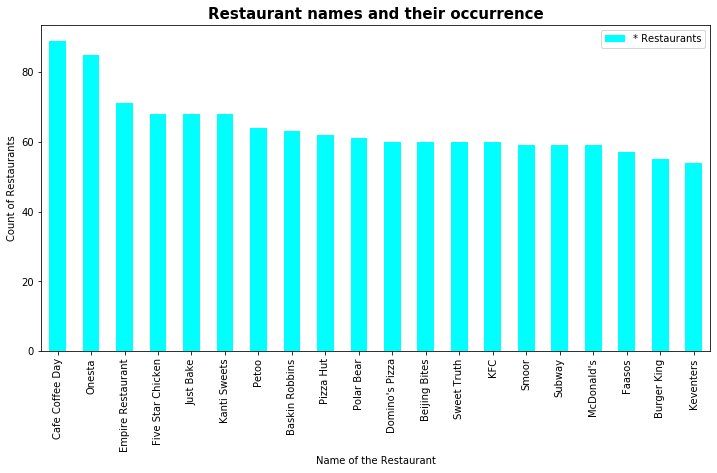

In [34]:
plt.figure(figsize = (12,6))
ax = df.name.value_counts()[:20].plot(kind = 'bar', color='cyan')
ax.legend(['* Restaurants'])
plt.xlabel("Name of the Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Restaurant names and their occurrence",fontsize =15, weight = 'bold')

Text(0.5, 1.0, 'Popularity of top 20 Restaurant types')

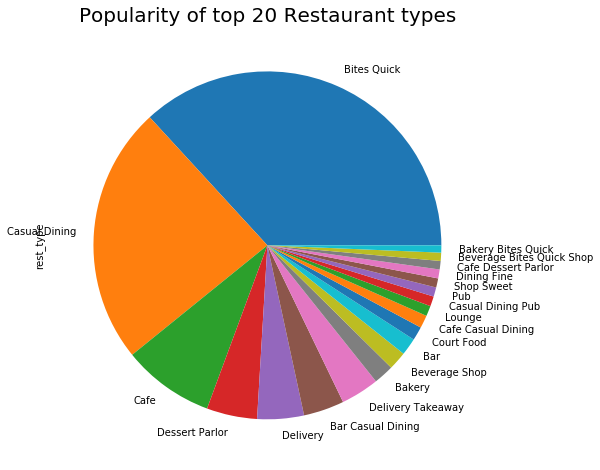

In [35]:
#Pie chart of most popular restaurant types
plt.figure(figsize=(8,8))
df.rest_type.value_counts()[:20].plot(kind = 'pie')
plt.title("Popularity of top 20 Restaurant types",fontsize =20)

Text(0.5, 1.0, 'Popularity of top 20 Cuisines')

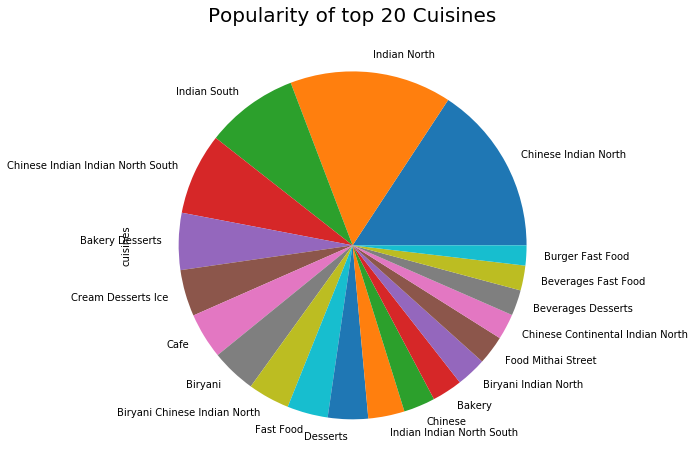

In [36]:
#Pie chart of most popular restaurant types
plt.figure(figsize=(8,8))
df.cuisines.value_counts()[:20].plot(kind = 'pie')
plt.title("Popularity of top 20 Cuisines",fontsize =20)

Text(0.5, 1.0, 'Location vs. Number of restaurants')

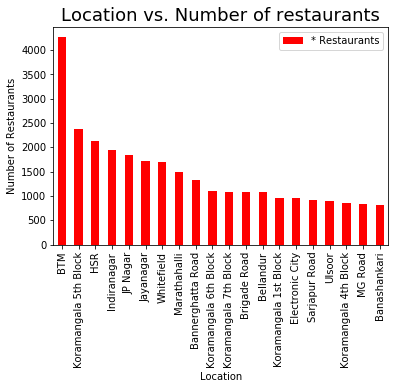

In [37]:
#LOcations vs. Number of restaurants
plt.figure()
ax = df.location.value_counts()[:20].plot(kind = 'bar', color='red')
ax.legend(['* Restaurants'])
plt.xlabel("Location")
plt.ylabel("Number of Restaurants")
plt.title("Location vs. Number of restaurants",fontsize =18)

The average rating is 3.700425560966713


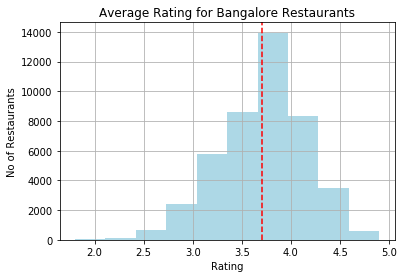

In [38]:
df.rate.hist(color='lightblue')
plt.axvline(x= df.rate.mean(),ls='--',color='red')
plt.title('Average Rating for Bangalore Restaurants')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print('The average rating is',df.rate.mean())

### ** Coverting Categorical Data to Numerical

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43942 entries, 0 to 51716
Data columns (total 10 columns):
name            43942 non-null object
online_order    43942 non-null int64
book_table      43942 non-null int64
rate            43942 non-null float64
votes           43942 non-null int64
location        43942 non-null object
rest_type       43942 non-null object
cuisines        43942 non-null object
approx_cost     43942 non-null float64
city            43942 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 4.9+ MB


In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x=['location','rest_type','cuisines']
for i in x:
    df[i]=le.fit_transform(df[i])
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,city
0,Jalsa,1,1,4.1,775,1,38,1318,800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,1,38,1331,800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,1,30,1114,800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,27,1658,300.0,Banashankari
4,Grand Village,0,0,3.8,166,4,38,1703,600.0,Banashankari


### 4. Splitting the Data into Test and Train sets

In [41]:
x=df.drop(['rate','name','city'], axis=1)
y=df['rate']

In [42]:
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(x,y, test_size=0.2, random_state=44)

### 5. Applying StandardScaler to the Data

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

### 6.A Logistic Regression

#### Training the Model

In [44]:
ytrain_int=ytrain.astype(int)
ytest_int=ytest.astype(int)    #Because float/continuous values can't be processed

In [45]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
result_lgr=lgr.fit(xtrain,ytrain_int)

C:\Users\khund\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\khund\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


#### Testing the Model

In [46]:
pred_lgr=result_lgr.predict(xtest)
pred_lgr

array([3, 4, 3, ..., 3, 3, 3])

#### 6.A.1 Accuracy of Logistic Regression

In [47]:
from sklearn.metrics import accuracy_score as acc

In [48]:
accuracy_lgr=acc(ytest_int,pred_lgr)

In [49]:
print('The Accuracy Score of Logistic Regression is', accuracy_lgr)

The Accuracy Score of Logistic Regression is 0.7981567868927067


#### 6.A.2 Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix as cfm
cmat_lgr=cfm(ytest_int,pred_lgr)
cmat_lgr

array([[   0,  437,   16],
       [   0, 5607,  311],
       [   0, 1010, 1408]], dtype=int64)

In [51]:
cdf_lgr=pd.DataFrame(cmat_lgr, index=['Actual Value A', 'Actual Value B', 'Actual Value C'], \
                     columns=['Predicted Value A', 'Predicted Value B', 'Predicted Value C'])
print('The Confusion Matrix for Logistic Regression')
cdf_lgr

The Confusion Matrix for Logistic Regression


,Predicted Value A,Predicted Value B,Predicted Value C
Actual Value A,0,437,16
Actual Value B,0,5607,311
Actual Value C,0,1010,1408


#### 6.A.3. Classification Report

In [52]:
from sklearn.metrics import classification_report as cfr

In [53]:
print('Classification Report for Logistic Regression \n\n', cfr(ytest_int,pred_lgr))

Classification Report for Logistic Regression 

               precision    recall  f1-score   support

           2       0.00      0.00      0.00       453
           3       0.79      0.95      0.86      5918
           4       0.81      0.58      0.68      2418

    accuracy                           0.80      8789
   macro avg       0.54      0.51      0.51      8789
weighted avg       0.76      0.80      0.77      8789



C:\Users\khund\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 6.A.4 Deploying the model

In [54]:
output_lgr=result_lgr.predict([[ 0.8, -0.6, 0.4, -1.2, -0.4,
        0.2, -1]])
output_lgr

array([4])

### 6.B. Decision Tree

#### Training the Model

In [55]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
result_dtc=dtc.fit(xtrain,ytrain_int) #decision tree 

#### Testing the Model

In [56]:
pred_dtc=result_dtc.predict(xtest)
pred_dtc

array([3, 4, 3, ..., 3, 3, 3])

#### 6.B.1 Accuracy of DTC

In [57]:
accuracy_dtc=acc(ytest_int,pred_dtc)
print('The Accuracy Score of Decision Tree Classifier is', accuracy_dtc)

The Accuracy Score of Decision Tree Classifier is 0.9742860393673911


#### 6.B.2 Confusion Matrix

In [58]:
cmat_dtc=cfm(ytest_int,pred_dtc)
cmat_dtc

array([[ 419,   25,    9],
       [  48, 5795,   75],
       [   8,   61, 2349]], dtype=int64)

In [59]:
cdf_dtc=pd.DataFrame(cmat_dtc, index=['Actual Value A', 'Actual Value B', 'Actual Value C'], \
                     columns=['Predicted Value A', 'Predicted Value B', 'Predicted Value C'])
print('The Confusion Matrix for Decision Tree Classifier:')
cdf_dtc

The Confusion Matrix for Decision Tree Classifier:


,Predicted Value A,Predicted Value B,Predicted Value C
Actual Value A,419,25,9
Actual Value B,48,5795,75
Actual Value C,8,61,2349


#### 6.B.3. Classification Report

In [60]:
print('Classification Report for Decision Tree Classifier \n\n', cfr(ytest_int,pred_dtc))

Classification Report for Decision Tree Classifier 

               precision    recall  f1-score   support

           2       0.88      0.92      0.90       453
           3       0.99      0.98      0.98      5918
           4       0.97      0.97      0.97      2418

    accuracy                           0.97      8789
   macro avg       0.94      0.96      0.95      8789
weighted avg       0.97      0.97      0.97      8789



#### 6.B.4 Deploying the model

In [61]:
output_dtc=result_dtc.predict([[ 0.8, -0.6, 0.4, -1.2, -0.4,
        0.2, -1]])
output_dtc

array([4])

### 6.C. Random Forest

#### Training the Model

In [62]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier()
result_rf=rf.fit(xtrain,ytrain_int) 

C:\Users\khund\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Testing the Model

In [63]:
pred_rf=result_rf.predict(xtest)
pred_rf

array([3, 4, 3, ..., 3, 3, 3])

#### 6.C.1 Accuracy

In [64]:
accuracy_rf=acc(ytest_int,pred_rf)
print('The Accuracy Score of Random Forest Classifier is', accuracy_rf)

The Accuracy Score of Random Forest Classifier is 0.9797474115371487


#### 6.C.2 Confusion Matrix

In [65]:
cmat_rf=cfm(ytest_int,pred_dtc)
cmat_rf

array([[ 419,   25,    9],
       [  48, 5795,   75],
       [   8,   61, 2349]], dtype=int64)

In [66]:
cdf_rf=pd.DataFrame(cmat_rf, index=['Actual Value A', 'Actual Value B', 'Actual Value C'], \
                     columns=['Predicted Value A', 'Predicted Value B', 'Predicted Value C'])
print('The Confusion Matrix for Random Forest Classifier:')
cdf_rf

The Confusion Matrix for Random Forest Classifier:


,Predicted Value A,Predicted Value B,Predicted Value C
Actual Value A,419,25,9
Actual Value B,48,5795,75
Actual Value C,8,61,2349


#### 6.C.3. Classification Report



In [67]:
print('Classification Report for Random Forest Classifier \n\n', cfr(ytest_int,pred_rf))

Classification Report for Random Forest Classifier 

               precision    recall  f1-score   support

           2       0.96      0.91      0.93       453
           3       0.98      0.99      0.99      5918
           4       0.98      0.96      0.97      2418

    accuracy                           0.98      8789
   macro avg       0.97      0.95      0.96      8789
weighted avg       0.98      0.98      0.98      8789



#### 6.C.4 Deploying the model

In [68]:
output_rf=result_rf.predict([[ 0.8, -0.6, 0.4, -1.2, -0.4,
        0.2, -1]])
output_rf

array([4])

### 6.D. KNN (K-Nearest Neighbor)

#### Training the Model

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=3)
result_knn=knc.fit(xtrain,ytrain_int)

#### Testing the Model

In [70]:
pred_knn=result_knn.predict(xtest)
pred_knn

array([3, 4, 3, ..., 3, 3, 3])

#### 6.D.1 Accuracy

In [71]:
accuracy_knn=acc(ytest_int,pred_knn)
print('The Accuracy Score of K Neighbor Classifier is', accuracy_knn)

The Accuracy Score of K Neighbor Classifier is 0.9436795994993742


#### 6.D.2 Confusion Matrix

In [72]:
cmat_knn=cfm(ytest_int,pred_knn)
cmat_knn

array([[ 339,  109,    5],
       [  96, 5707,  115],
       [  26,  144, 2248]], dtype=int64)

In [73]:
cdf_knn=pd.DataFrame(cmat_knn, index=['Actual Value A', 'Actual Value B', 'Actual Value C'], \
                     columns=['Predicted Value A', 'Predicted Value B', 'Predicted Value C'])
print('The Confusion Matrix for K Neighbor Classifier:')
cdf_knn

The Confusion Matrix for K Neighbor Classifier:


,Predicted Value A,Predicted Value B,Predicted Value C
Actual Value A,339,109,5
Actual Value B,96,5707,115
Actual Value C,26,144,2248


#### 6.D.3. Classification Report

In [74]:
print('Classification Report for K Neighbor Classifier \n\n', cfr(ytest_int,pred_knn))

Classification Report for K Neighbor Classifier 

               precision    recall  f1-score   support

           2       0.74      0.75      0.74       453
           3       0.96      0.96      0.96      5918
           4       0.95      0.93      0.94      2418

    accuracy                           0.94      8789
   macro avg       0.88      0.88      0.88      8789
weighted avg       0.94      0.94      0.94      8789



#### 6.D.4 Deploying the model

In [75]:
output_knn=result_knn.predict([[ 0.8, -0.6, 0.4, -1.2, -0.4,
        0.2, -1]])
output_knn

array([4])

### 6.E. SVM (Support Vector Machine)

#### Training the Model

In [76]:
from sklearn.svm import SVC
model=SVC(kernel='rbf', random_state=0)
result_svm=model.fit(xtrain,ytrain_int)

#### Testing the model

In [77]:
pred_svm=result_svm.predict(xtest)
pred_svm

array([3, 4, 3, ..., 3, 3, 3])

#### 6.E.1 Accuracy

In [78]:
accuracy_svm=acc(ytest_int,pred_svm)
print('The Accuracy Score of Suppport Vector Machine method is', accuracy_svm)

The Accuracy Score of Suppport Vector Machine method is 0.8210262828535669


#### 6.E.2 Confusion Matrix

In [79]:
cmat_svm=cfm(ytest_int,pred_svm)
cmat_svm

array([[   0,  434,   19],
       [   0, 5658,  260],
       [   0,  860, 1558]], dtype=int64)

In [80]:
cdf_svm=pd.DataFrame(cmat_svm, index=['Actual Value A', 'Actual Value B', 'Actual Value C'], \
                     columns=['Predicted Value A', 'Predicted Value B', 'Predicted Value C'])
print('The Confusion Matrix for Support Vector Machine method:')
cdf_svm

The Confusion Matrix for Support Vector Machine method:


,Predicted Value A,Predicted Value B,Predicted Value C
Actual Value A,0,434,19
Actual Value B,0,5658,260
Actual Value C,0,860,1558


#### 6.E.3. Classification Report

In [81]:
print('Classification Report for Support Vector Machine method \n\n', cfr(ytest_int,pred_svm))

Classification Report for Support Vector Machine method 

               precision    recall  f1-score   support

           2       0.00      0.00      0.00       453
           3       0.81      0.96      0.88      5918
           4       0.85      0.64      0.73      2418

    accuracy                           0.82      8789
   macro avg       0.55      0.53      0.54      8789
weighted avg       0.78      0.82      0.79      8789



C:\Users\khund\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 6.E.4 Deploying the model

In [82]:
output_svm=result_svm.predict([[ 0.8, -0.6, 0.4, -1.2, -0.4,
        0.2, -1]])
output_svm

array([3])

### 7. Observing the accuracy of each model

In [83]:
print('The accuracy of the models is as follows:')
print('\nLogistic Regression: {} \nDecision Tree: {} \nRandom Forest: {} \nKNN: {} \nSVM: {}' \
      .format(accuracy_lgr,accuracy_dtc,accuracy_rf,accuracy_knn,accuracy_svm))

The accuracy of the models is as follows:

Logistic Regression: 0.7981567868927067 
Decision Tree: 0.9742860393673911 
Random Forest: 0.9797474115371487 
KNN: 0.9436795994993742 
SVM: 0.8210262828535669


In [84]:
print('Random Forest model gives the highest accuracy.')

Random Forest model gives the highest accuracy.


### 8. Choosing the best model

In [85]:
print('Random Forest is the best model to solve this problem as it gives the highest accuracy.')

Random Forest is the best model to solve this problem as it gives the highest accuracy.


### Conclusion: Random Forest is the best model to solve this problem and it gives an accuracy of 97.97%.

### The End.